In [1]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob

In [2]:
df=pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

In [3]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [5]:
df2=df.loc[:,['reviews.text']]

In [6]:
df2.head()

,reviews.text
0,I thought it would be as big as small paper bu...
1,This kindle is light and easy to use especiall...
2,Didnt know how much i'd use a kindle so went f...
3,I am 100 happy with my purchase. I caught it o...
4,Solid entry level Kindle. Great for kids. Gift...


In [7]:
len(df2)

5000

In [25]:
corpus=df2['reviews.text'].tolist()

In [27]:
len(corpus)

5000

In [56]:
corpus[1]

'This kindle is light and easy to use especially at the beach!!!'

In [57]:
from string import punctuation
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words=stopwords.words('English')
type(stop_words)

punct=list(punctuation)
type(punct)

remove_words=stop_words+punct

type(remove_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Me\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


list

In [66]:
from textblob import Word
from nltk.stem import LancasterStemmer 
ps=LancasterStemmer()

def preprocessing(review):
    lower=review.lower() #converting to lower case
    blob=TextBlob(lower)
    tokenized=blob.words # tokenize to words
    clean_words=[i for i in tokenized if i not in remove_words] # remove stopwords
    remove_digits = [i for i in clean_words if not i.isdigit()] # remove numbers
    lemmatize= [Word(i).lemmatize() for i in remove_digits]
    #stemming=[ps.stem(i) for i in lemmatize]
    binding= " ".join(lemmatize)
    return binding

    
    

In [67]:
def adjectives(text):
    t=''
    blob=TextBlob(text)
    for words,pos in blob.tags:
        if(pos=='JJ'or pos=='JJR' or pos=='JJS'):
            t=t+' '+words
    return t
            

In [68]:
df3=[]
for i in range(len(corpus)):
    z=preprocessing(corpus[i])
    a=adjectives(z)
    df3.append(a)

In [69]:
new_df=pd.DataFrame(df3)
new_df.columns=['review']

In [70]:
new_df.head()

,review
0,big small small comfortable regular
1,light easy
2,kindle lower happy little
3,happy good real old portable fit better giant...
4,solid great kid good higher


In [53]:
!pip install wordcloud

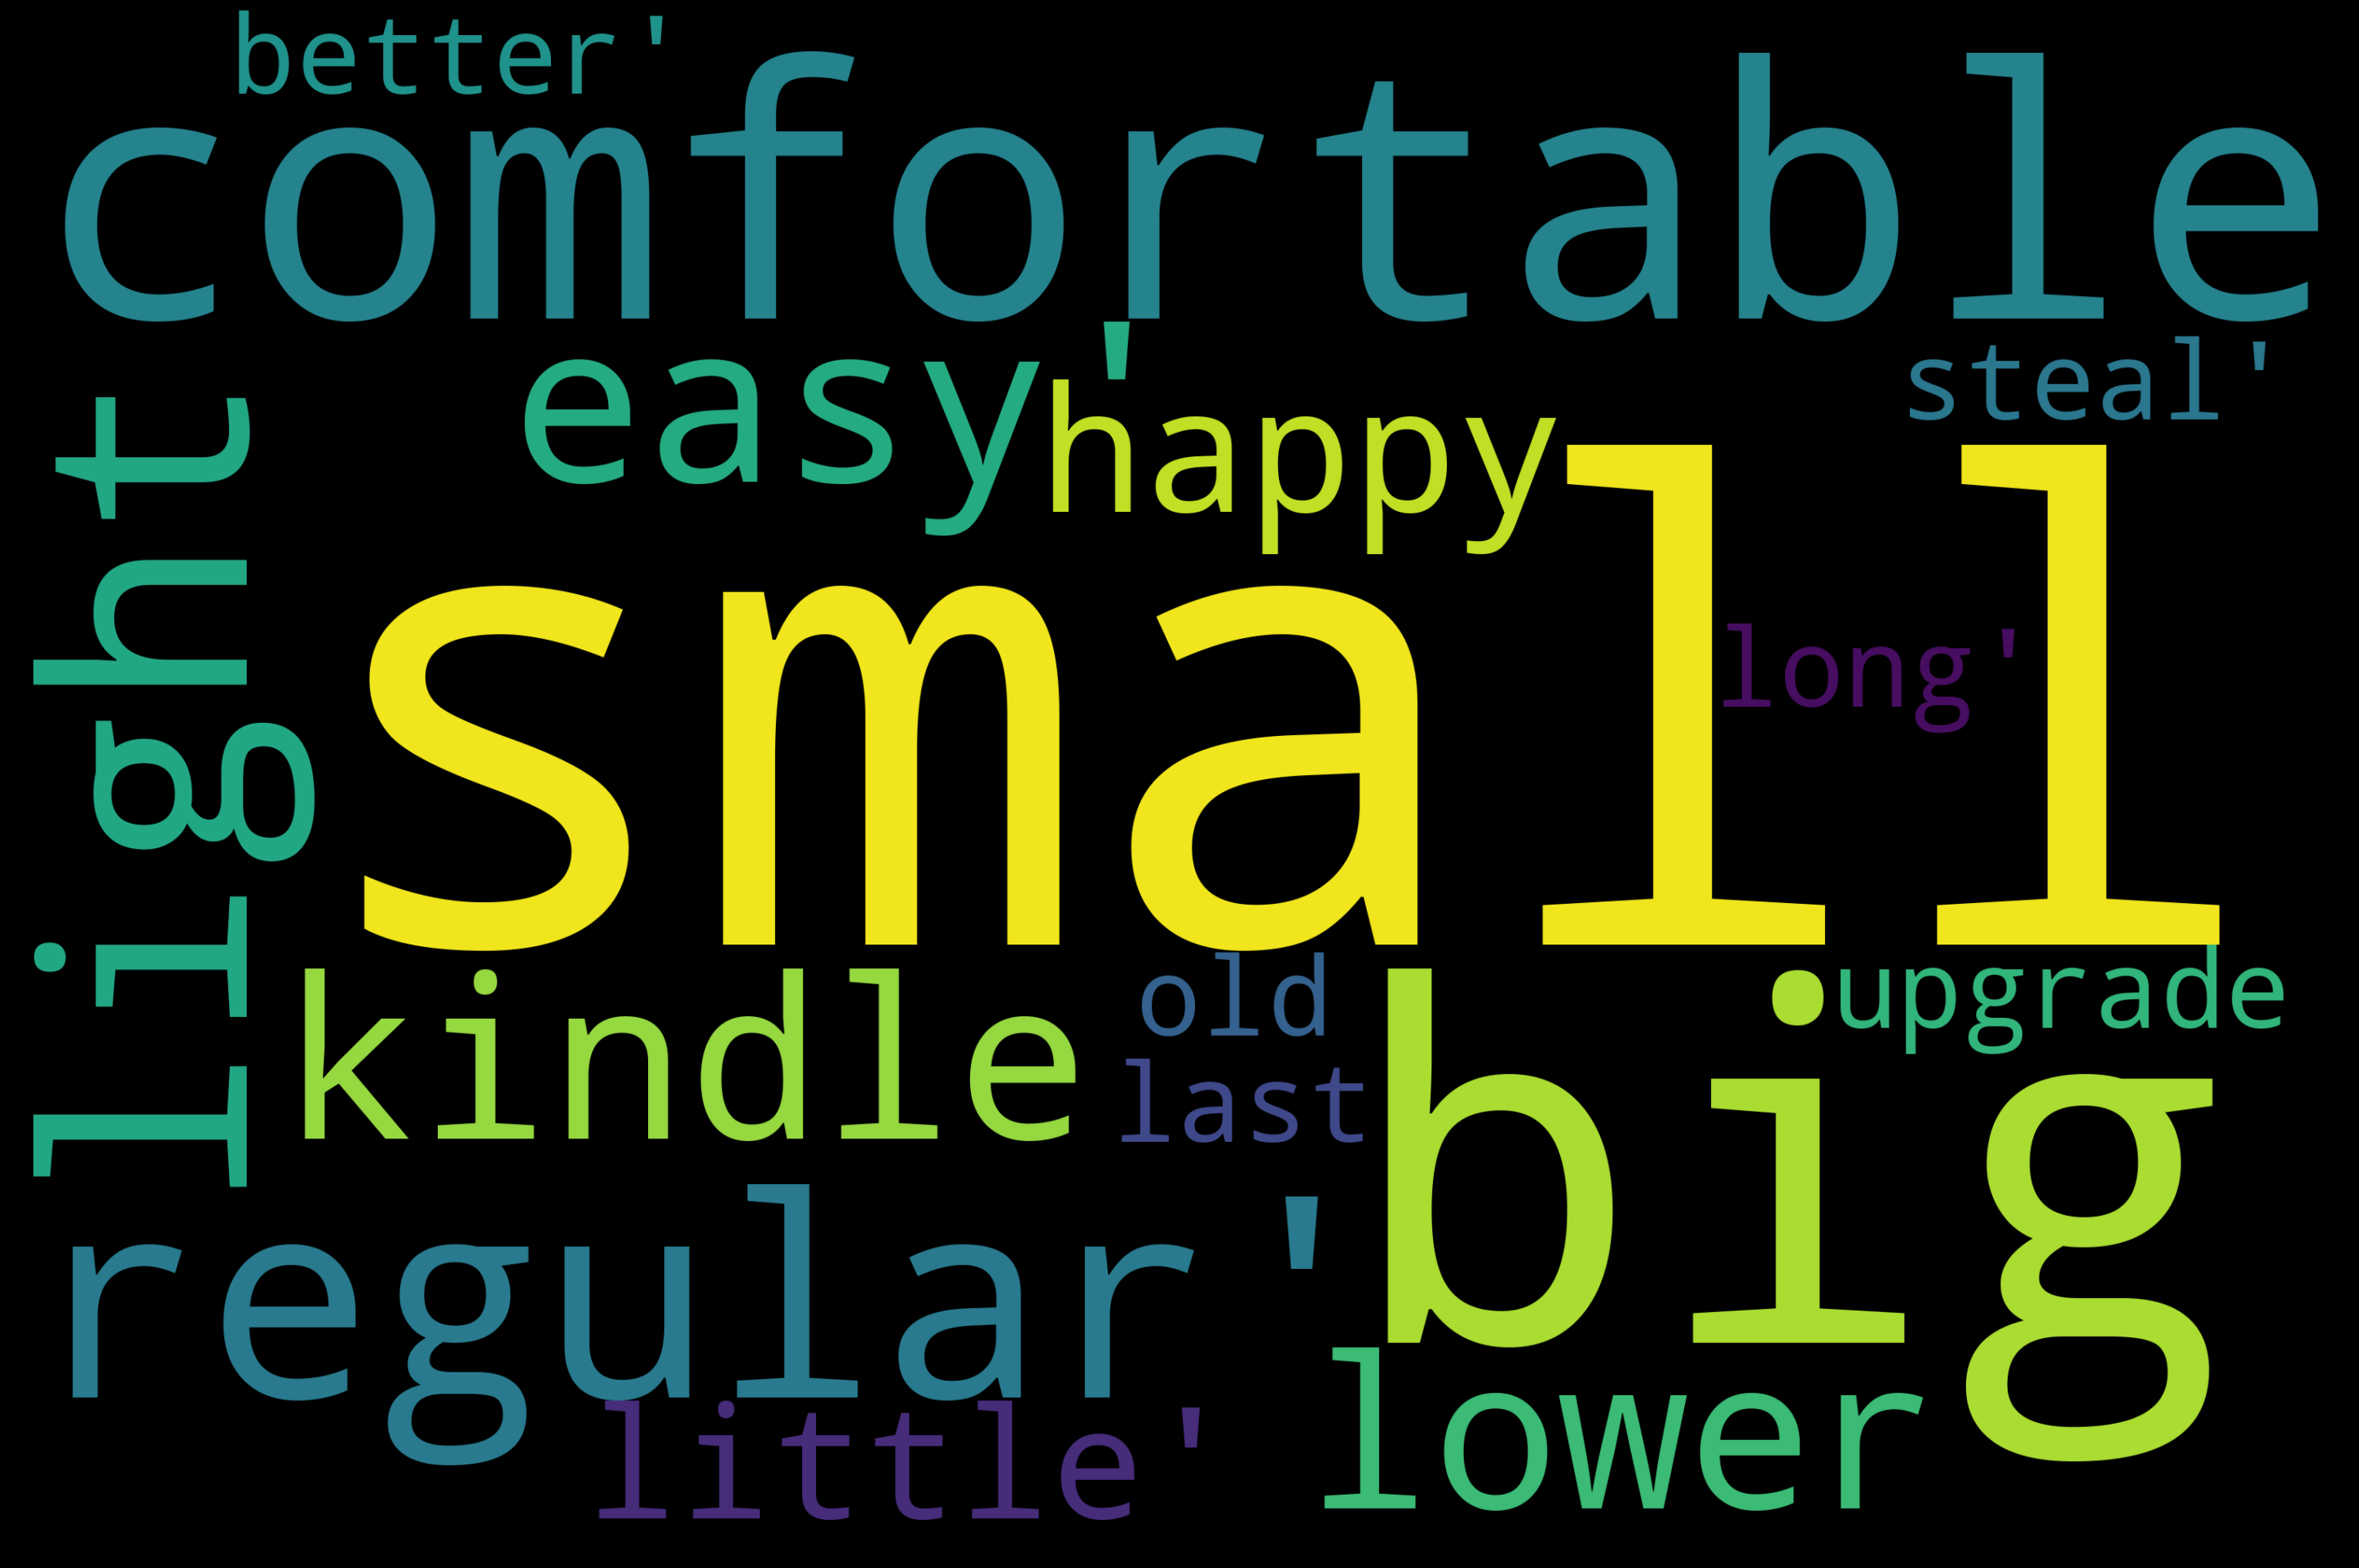

In [71]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = new_df.review.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [73]:
adjectives=new_df['review'].tolist()

In [74]:
adjectives[1]

' light easy'

In [89]:
dict_list=[]
score_list=[]

def dictionary(adj):
    count={}
    blob=TextBlob(adj)
    for words in blob.words:
        if words in count:
            count[words]=count[words]+1
        else:
            count[words]=1
    return count    

In [90]:
def measure(adj):
    blob=TextBlob(adj)
    score=blob.sentiment.polarity
    return score

In [91]:
for i in range(len(adjectives)):
    text=dictionary(adjectives[i])
    dict_list.append(text)
    sensitivity= measure(adjectives[i])
    score_list.append(sensitivity)

In [92]:
new_df['count adjectives']=pd.DataFrame(pd.Series(dict_list))
new_df['sensitivity']=pd.DataFrame(score_list)

In [95]:
new_df.head()

,review,count adjectives,sensitivity
0,big small small comfortable regular,"{'big': 1, 'small': 2, 'comfortable': 1, 'regu...",-0.020000
1,light easy,"{'light': 1, 'easy': 1}",0.416667
2,kindle lower happy little,"{'kindle': 1, 'lower': 1, 'happy': 1, 'little'...",0.306250
3,happy good real old portable fit better giant...,"{'happy': 1, 'good': 1, 'real': 1, 'old': 2, '...",0.254167
4,solid great kid good higher,"{'solid': 1, 'great': 1, 'kid': 1, 'good': 1, ...",0.437500
